# Objective

* Identify the Which Platform have more impact on Income 

* To build the Model which will help to Predict the future Income based on Different Platform 

In [2]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


# Data import

In [3]:
new = pd.read_csv(r"C:\Users\cheta\Desktop\python\Machine learning with python\Linear Regression\Income dataset.csv") #for an earlier version of Excel, you may need to use the file extension of 'xls'
new

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150


C:\Users\cheta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


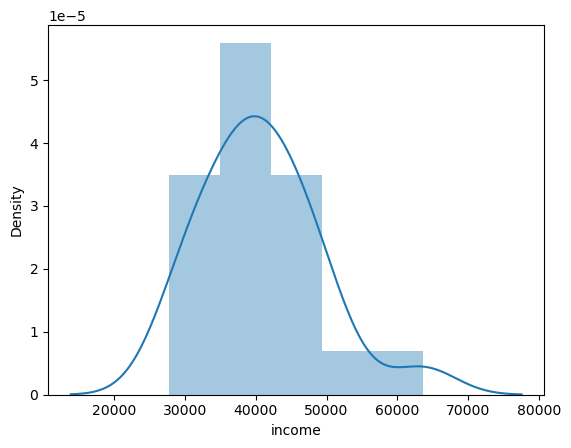

In [4]:
ax = sns.distplot(new.income)

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


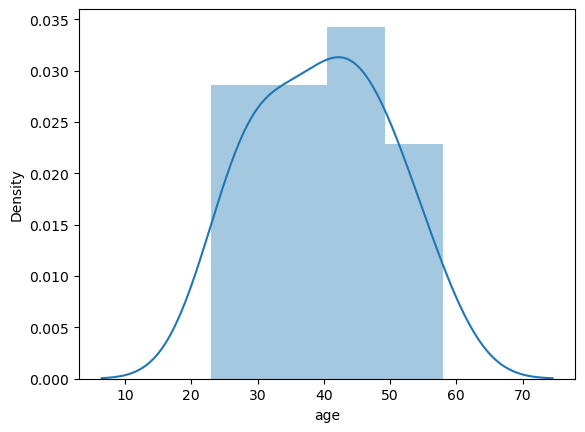

In [5]:
ax = sns.distplot(new.age)

C:\Users\cheta\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


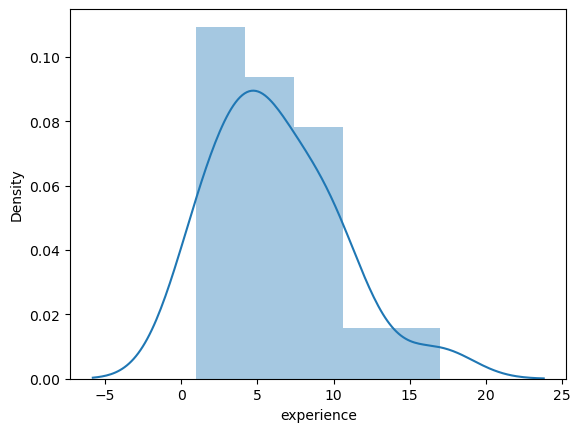

In [6]:
ax = sns.distplot(new.experience)

# Data type

In [7]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes


# Univariate Analysis

In [8]:
new.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


# EDA
* Identify & Treatment of Outlier 

<AxesSubplot:>

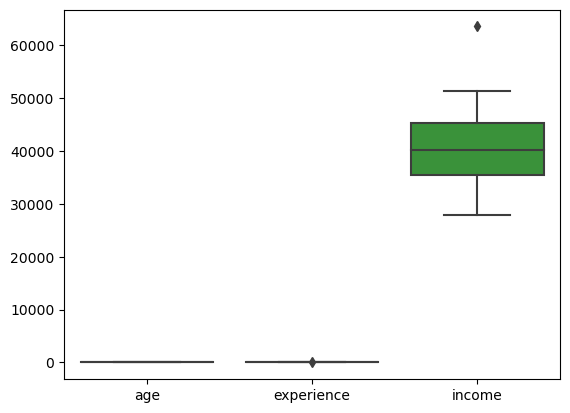

In [9]:
sns.boxplot(data=new)

In [10]:
q1 = new['income'].quantile(0.25)
q3 = new['income'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr #acceptable range
upper_limit

60296.25

In [11]:
new['income']=np.where(new['income'] > upper_limit,upper_limit,new['income']) # upper limit

### Treatment of Outlier -- Winsorizing Technique

In [12]:
for i in new:
    q1 = new[i].quantile(0.25)
    q3 = new[i].quantile(0.75)
    iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
    upper_limit = q3+1.5*iqr #acceptable range
    lower_limit = q1-1.5*iqr
    new[i]=np.where(new[i]>upper_limit,upper_limit,new[i])
    new[i]=np.where(new[i]<lower_limit,lower_limit,new[i])
    if type(i)==str:
        continue

<AxesSubplot:>

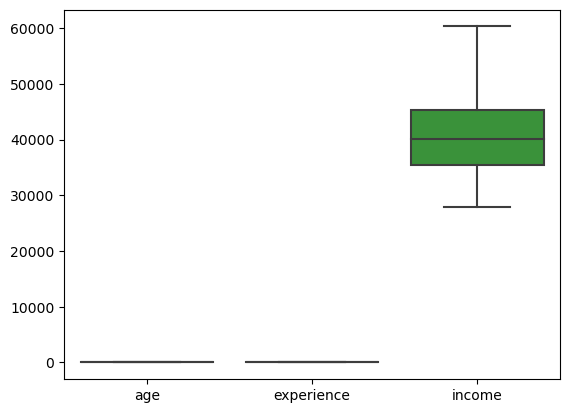

In [13]:
sns.boxplot(data=new)

### Missing Value

In [14]:
new.isna().sum() 

age           0
experience    0
income        0
dtype: int64

# Step 3 : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [15]:
new.head()

,age,experience,income
0,25.0,1.0,30450.0
1,30.0,3.0,35670.0
2,47.0,2.0,31580.0
3,32.0,5.0,40130.0
4,43.0,10.0,47830.0


In [16]:
# Putting feature variable to X
X = new.drop('income', axis= 1)

# Putting response variable to y
y = new[['income']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.8 ,random_state=120)

In [17]:
df = pd.concat([y_train, X_train], axis=1)
df.head()

,income,age,experience
5,41630.00,51.0,7.000
11,46110.00,47.0,9.000
14,51300.00,44.0,12.000
17,30870.00,23.0,1.000
16,60296.25,58.0,16.875


# Correlation Matrix

<AxesSubplot:title={'center':'income vs age'}, xlabel='age', ylabel='income'>

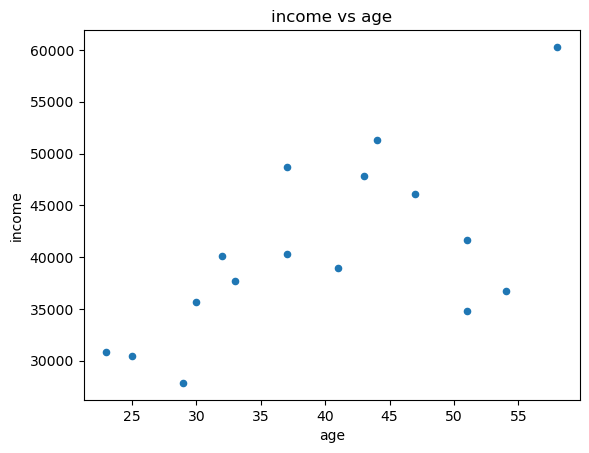

In [18]:
df.plot.scatter(x='age', y='income', title='income vs age')

In [19]:
df.corr()

,income,age,experience
income,1.000000,0.627565,0.987924
age,0.627565,1.000000,0.692855
experience,0.987924,0.692855,1.000000


<AxesSubplot:>

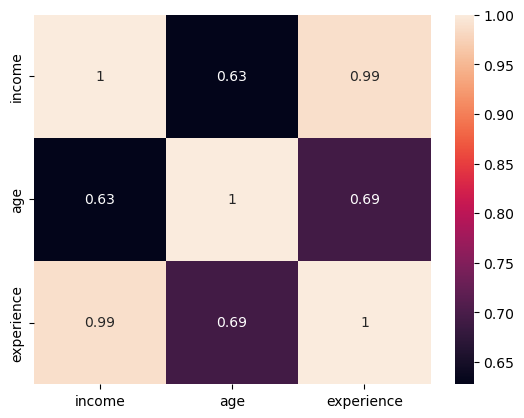

In [20]:
sns.heatmap(df.corr(),annot = True)

### experience have 97%  strong positve correlation with income

* experience have high impact on income
* There is no colinearity in data, So every platform is independent 

### Multicolinearity (with the help of VIF)

In [21]:
X1 = df.drop(['income'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

age           5.149508
experience    5.149508
dtype: float64

* No collinearity in the data, indicate no multi colinearity 

# Model Building

*  H0 :- There is no Linear relationship between income and age , experience

                         Vs 

*  H1 :- There is Linear relationship between income and age , experience

Alpha = 0.05 (5%)

In [22]:
df.income = np.log(df.income)
df

,income,age,experience
5,10.636576,51.0,7.000
11,10.738785,47.0,9.000
14,10.845446,44.0,12.000
17,10.337540,23.0,1.000
16,11.007025,58.0,16.875
3,10.599879,32.0,5.000
13,10.457373,51.0,4.000
19,10.793434,37.0,10.000
12,10.511077,54.0,5.000
1,10.482065,30.0,3.000


In [23]:
import statsmodels.formula.api as smf
model = smf.ols('income ~ age + experience',data=df).fit()
model.summary()

C:\Users\cheta\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     115.4
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           5.32e-09
Time:                        11:43:12   Log-Likelihood:                 26.503
No. Observations:                  16   AIC:                            -47.01
Df Residuals:                      13   BIC:                            -44.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3464      0.055    187.409      0.000      10.227      10.466
age           -0.0014      0.002     -0.802      0.437      -0.005       0.002
experience     0.0479      0.004     11.493      0.000       0.039       0.057
==============================================================================
Omnibus:                        4.993   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                2.541
Skew:                          -0.910   Prob(JB):                        0.281
Kurtosis:                       3.704   Cond. No.                         179.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is Linear relationship between income and experience
* There is no Linear relationship between income and age 
 * so we will remove and re-run the model 
* 94% is accuracy of model , so we say model is good fit 

In [24]:
# removing the insignificant variable 

model2=smf.ols('income ~ experience',data=df).fit()
model2.summary()

C:\Users\cheta\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     236.1
Date:                Sat, 04 Mar 2023   Prob (F-statistic):           3.70e-10
Time:                        11:43:12   Log-Likelihood:                 26.117
No. Observations:                  16   AIC:                            -48.23
Df Residuals:                      14   BIC:                            -46.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3060      0.022    459.541      0.000      10.258      10.354
experience     0.0456      0.003     15.365      0.000       0.039       0.052
==============================================================================
Omnibus:                        2.909   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.234   Jarque-Bera (JB):                1.350
Skew:                          -0.696   Prob(JB):                        0.509
Kurtosis:                       3.294   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is Linear relationship between income and experienced
* 94% is accuracy of model , so we say model is good fit 
* Y = 10.3060 + 0.0456 * experience 

In [25]:
X1=df.loc[:,['experience', 'age']]
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])], 
                          index=X1.columns)
series_before

experience    5.149508
age           5.149508
dtype: float64

# Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

In [26]:
df.head()

,income,age,experience
5,10.636576,51.0,7.000
11,10.738785,47.0,9.000
14,10.845446,44.0,12.000
17,10.337540,23.0,1.000
16,11.007025,58.0,16.875


In [27]:
# Y = 10.3060 + 0.0456* experience
Y = 10.3060 + 0.0456 * 7
Y

10.6252

In [28]:
df['fitted_value']=model2.fittedvalues #Predicted Value
df['residual']=model2.resid  #Error
df.head()

,income,age,experience,fitted_value,residual
5,10.636576,51.0,7.000,10.625204,0.011372
11,10.738785,47.0,9.000,10.716402,0.022383
14,10.845446,44.0,12.000,10.853199,-0.007753
17,10.337540,23.0,1.000,10.351611,-0.014070
16,11.007025,58.0,16.875,11.075494,-0.068469


# Linearity

<AxesSubplot:title={'center':'income vs experience'}, xlabel='experience', ylabel='income'>

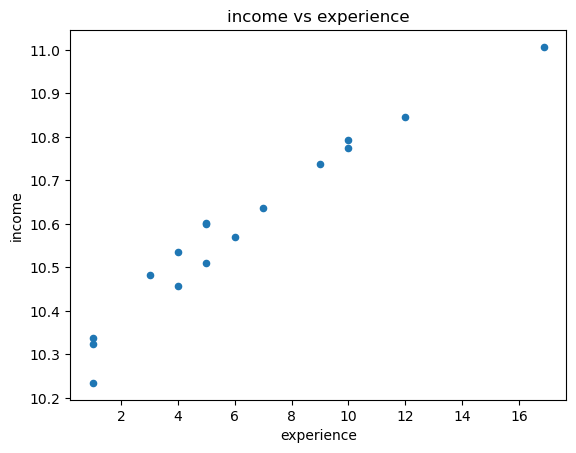

In [29]:
df.plot.scatter(x='experience', y='income', title='income vs experience')

# Homoscedasicity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

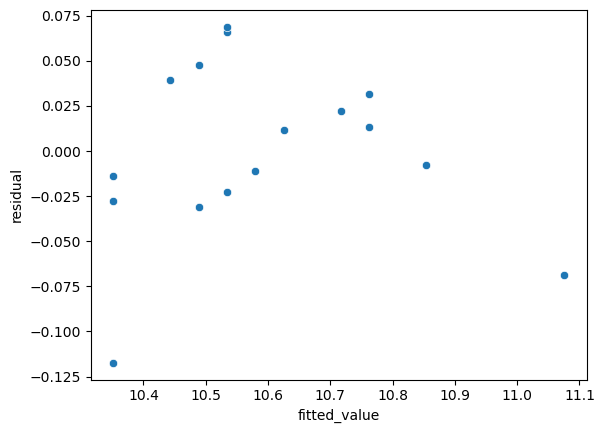

In [30]:
sns.scatterplot(x='fitted_value', y='residual',data=df)

# Normality

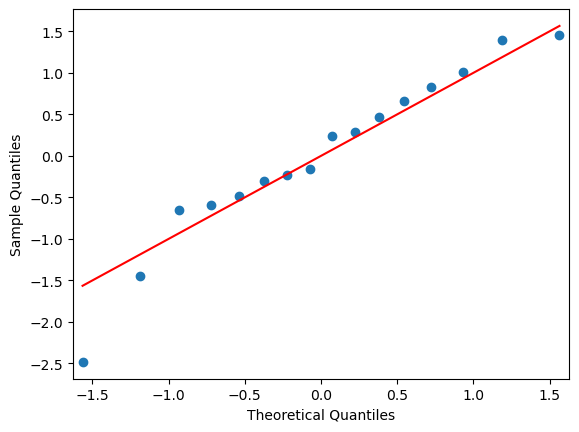

In [31]:
import statsmodels.api as sm
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

# Model Error are IID 

<AxesSubplot:ylabel='Frequency'>

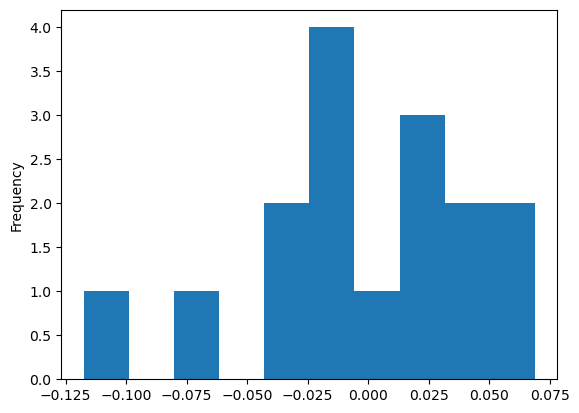

In [32]:
df['residual'].plot.hist()

# Prediction on Test Data (unseen data)

In [33]:
y_test = np.log(y_test) 
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,age,experience,income
18,44.0,9.0,10.696254
6,28.0,5.0,10.629586
9,39.0,8.0,10.717746
2,47.0,2.0,10.360279


In [34]:
df_test['Prediction']=model2.predict(df_test)# predict = all row prediction ( Auto )
df_test['Original_prediction']=np.exp(model2.predict(df_test)) 
df_test.head()

,age,experience,income,Prediction,Original_prediction
18,44.0,9.0,10.696254,10.716402,45089.395980
6,28.0,5.0,10.629586,10.534006,37571.703010
9,39.0,8.0,10.717746,10.670803,43079.537622
2,47.0,2.0,10.360279,10.397210,32768.059849


# Test

In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.income, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.84


# Train

In [36]:
from sklearn.metrics import r2_score
r2 = r2_score(df.income, df.fitted_value)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.94


* Model is good fit on Train dataset  & Performance of model on Test data is also good fit 

# Loss Function - RMSE

In [37]:
import math
from sklearn.metrics import mean_squared_error
# calculate the mean squared error
model_mse = mean_squared_error(df['income'], df['fitted_value'])
model_rmse = math.sqrt(model_mse)
print("RMSE {:.3}".format(np.exp(model_rmse)))

RMSE 1.05


In [38]:
import math
from sklearn.metrics import mean_squared_error
# calculate the mean squared error
model_mse = mean_squared_error(df_test['income'], df_test['Prediction'])
model_rmse = math.sqrt(model_mse)
print("RMSE {:.3}".format(np.exp(model_rmse)))

RMSE 1.06


# Prediction for Live Data  -- Population

In [39]:
d1 = {'Employee'   :pd.Series(['Chetan','Himanshu','Ajinkya']),
      'age'        :pd.Series([25,26,24]),
      'experience' :pd.Series([3,4,2]),
     }
live = pd.DataFrame(d1)
live

,Employee,age,experience
0,Chetan,25,3
1,Himanshu,26,4
2,Ajinkya,24,2


In [40]:
live['future Prediction']=np.round(model.predict(live),2)
live

,Employee,age,experience,future Prediction
0,Chetan,25,3,10.46
1,Himanshu,26,4,10.50
2,Ajinkya,24,2,10.41


# Finish